## Hotel Reservations Analysis

#### Table of Contents

1. [Introduction](#1.-Introduction)
    - Background

    - Problem Statement

    - Objectives

    - Research Questions

    - Hypothesis

2. [Datasets](#2.-Datasets)
    
3. [Methodology](#3.-Methodology)
    - Data Preprocessing

    - Exploratory Data Analysis (EDA)

    - Feature Engineering

    - Model Selection

    - Model Evaluation

    - Hyperparameter Tuning


4. [Implementation](#4.-Implementation)

    a. [Import Necessary Libraries](#a.-Import-Necessary-Libraries)

    b. [Load the Datasets](#b.-Load-the-Datasets)
    
    c. [Inspect the Data](#c.-Inspect-the-Data)

    - [Key Findings from Data Inspection](#Key-Findings-from-Data-Inspection)

    d. [Data Preprocessing](#d.-Data-Pre-processing)

    e. [Exploratory Data Analysis (EDA)](#e.-Exploratory-Data-Analysis-(EDA))

    - [Early Insights](#Early-Insights)

#### 1. Introduction

- **Background**
    - Hotel booking cancellations impact revenue management and operational efficiency in the hospitality industry. Understanding the drivers behind cancellations can help hotels optimize their strategies.

- **Problem Statement**
    - High cancellation rates create uncertainty in forecasting occupancy and revenue, making it challenging for hotels to plan resources and maximize profitability. Also, every cancellation is revenue out the door, and hotels need to understand why cancellations happen to mitigate their impact.

- **Objectives**
    - Identify key factors influencing hotel booking cancellations.

    - Analyze the differences in cancellation patterns between resort and city hotels.

    - Build predictive models to estimate cancellation likelihood.

    - Provide actionable insights to reduce cancellations and improve hotel performance.

    - Develop a comprehensive plan to prevent cancellations and mitigate their impact on hotel operations.

- **Research Questions**
    - What are the main predictors of hotel booking cancellations?

    - Can we accurately predict cancellations using customer and booking data?

    - How do cancellation patterns differ between resort and city hotels?

    - What insights can we draw to make better pricing and promotion decisions?

- **Hypothesis**: The following factoes are likely to influence the chance of cancellation:
    - Booking Timing & Stay Details

    - Guest Details

    - Booking Source and Channel

    - Room Type and Services

    - Customer Profile

    - Booking Behavior

    - Pricing and Deposits

    

#### 2. Datasets


- Data Source: The dataset is sourced from the [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191) dataset.

- Data Description: The dataset includes information about hotel bookings, including customer details, booking dates, cancellation status, and other relevant features.

- Data period: July 2015 - August 2017

#### 3. Methodology

- Data Preprocessing: Clean and preprocess the data to handle missing values, outliers, and categorical variables.

- Exploratory Data Analysis (EDA): Perform EDA to understand the distribution of features, identify patterns, and visualize relationships between variables.

- Feature Engineering: Create new features based on existing data to enhance the predictive power of the model.

- Model Selection: Choose appropriate machine learning algorithms for classification tasks, such as logistic regression, decision trees, random forests, and gradient boosting.

- Model Evaluation: Evaluate model performance using metrics like accuracy, precision, recall, and F1-score.

- Hyperparameter Tuning: Optimize model parameters using techniques like grid search or random search to improve performance.

#### 4. Implementation

##### a. Import Necessary Libraries

In [168]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

# Import the custom module
import helper as hlp
importlib.reload(hlp)

<module 'helper' from '/Users/priyadarshanparida/JSOM /S25/MKT 6337.003 - Predictive Analytics for Data Science - S25/term-project/code/helper.py'>

##### b. Load the Datasets

In [169]:
# Load individual datasets for resort and city hotels
resort_hotel_data = pd.read_csv('../data-set/H1.csv', na_values = ['NULL'], skipinitialspace = True)
city_hotel_data = pd.read_csv('../data-set/H2.csv', na_values = ['NULL'], skipinitialspace = True)

# Add 'hotel_type' column at the first position
resort_hotel_data.insert(0, 'HotelType', 'Resort')
city_hotel_data.insert(0, 'HotelType', 'City')

# Combine the datasets into one DataFrame
hotel_reservations_data = pd.concat([resort_hotel_data, city_hotel_data], axis=0)

# Reset the index of the combined DataFrame
hotel_reservations_data.reset_index(drop=True, inplace=True)

# Change Pascal case column names to snake case
hotel_reservations_data.columns = hotel_reservations_data.columns.str.replace('([a-z])([A-Z])', r'\1_\2', regex=True).str.lower()

# View the first few rows of the combined dataset
hotel_reservations_data.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


##### c. Inspect the Data

In [170]:
# Check the shape and structure of the dataset
print(f"Shape of the data: {hotel_reservations_data.shape}")

Shape of the data: (119390, 32)


In [171]:
# Display the dataset info after reordering
hotel_reservations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [172]:
# Check for missing values
missing_values = hotel_reservations_data.isnull().sum()
print(f"Missing values in the dataset: \n{missing_values[missing_values > 0]}")

Missing values in the dataset: 
children         4
country        488
agent        16340
company     112593
dtype: int64


In [173]:
# Example usage
columns_to_analyze = [
    'meal', 'country', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'customer_type', 'reservation_status'
]
categorical_features = hlp.analyze_categorical_features(hotel_reservations_data, columns_to_analyze)
print("Categorical features that are of object type:")
categorical_features

Categorical features that are of object type:


,Categorical Feature,Unique Values,Unique Value Count
0,meal,"[BB , FB , HB , SC , U...",5
1,country,"[PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, ...",177
2,market_segment,"[Direct, Corporate, Online TA, Offline TA/TO, ...",8
3,distribution_channel,"[Direct, Corporate, TA/TO, Undefined, GDS]",5
4,reserved_room_type,"[C , A , D ...",10
5,assigned_room_type,"[C , A , D ...",12
6,deposit_type,"[No Deposit , Refundable , Non Refund ...",3
7,customer_type,"[Transient, Contract, Transient-Party, Group]",4
8,reservation_status,"[Check-Out, Canceled, No-Show]",3


In [174]:
# Basic statistics for numerical columns
print(f"Basic statistics for numerical columns:\n{hotel_reservations_data.describe().transpose()}")

Basic statistics for numerical columns:
                                   count         mean         std      min  \
is_canceled                     119390.0     0.370416    0.482918     0.00   
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year               119390.0  2016.156554    0.707476  2015.00   
arrival_date_week_number        119390.0    27.165173   13.605138     1.00   
arrival_date_day_of_month       119390.0    15.798241    8.780829     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     1.856403    0.579261     0.00   
children                        119386.0     0.103890    0.398561     0.00   
babies                          119390.0     0.007949    0.097436     0.00   
is_repeated_guest               119390.0     0.031912    0.175767     0.00   
previous_cancellations  

##### Key Findings from Data Inspection


| Feature         | Feature Type | Unique Values (sample)                   | Unique Value Count | Data Cleaning                                      |
|-----------------|--------------|------------------------------------------|--------------------|----------------------------------------------------------|
| meal            | categorical  | BB, FB, HB, SC, Undefined                | 5                  | Strip spaces, group 'Undefined' with SC      |
| country         | categorical  | PRT, GBR, USA, ...                       | 177                | Impute or flag missing values (488 missing)              |
| reserved_room_type | categorical | A, B, C, D, E, F, G, H, L, P           | 10                 | Strip spaces                                             |
| assigned_room_type | categorical | A, B, C, D, E, F, G, H, I, K, L, P     | 12                 | Strip spaces                                             |
| deposit_type    | categorical  | No Deposit, Refundable, Non Refund       | 3                  | Strip spaces                                             |
| reservation_status_date | date | e.g., 2015-07-01                         | many               | Convert to datetime                                      |
| adults          | numeric      | 0-55                                     | 55                 | Check for zeros (possible data issue)                    |
| children        | numeric      | 0-10                                     | 11                 | Impute or flag missing values (4 missing)                |
| agent           | numeric      | float (agent IDs)                        | many               | Impute or flag missing values (16340 missing)            |
| company         | numeric      | float (company IDs)                      | many               | Impute or flag missing values (112593 missing)           |
| adr             | numeric      | -6.38 to 5400                            | many               | Check for outliers/negatives                             


##### d. Data Pre-processing

In [175]:
count_before_data_preprocessing = hotel_reservations_data.shape[0]
# Data cleaning for 'meal' column

# Strip spaces from all values in 'meal'
hotel_reservations_data['meal'] = hotel_reservations_data['meal'].str.strip()

# Group 'Undefined' with 'SC' (assuming 'SC' means no meal)
hotel_reservations_data['meal'] = hotel_reservations_data['meal'].replace('Undefined', 'SC')

# Check the unique values after cleaning
print("Unique values in 'meal' after cleaning:", hotel_reservations_data['meal'].unique())

Unique values in 'meal' after cleaning: ['BB' 'FB' 'HB' 'SC']


In [176]:
# Data cleaning for 'country' column

# Impute missing values in 'country' with 'Unknown'
hotel_reservations_data['country'] = hotel_reservations_data['country'].fillna('Unknown')

# Check the unique values after imputation
print("Number of unique values in 'country' after imputation:", hotel_reservations_data['country'].nunique())
print("Does 'Unknown' exist in 'country'?", 'Unknown' in hotel_reservations_data['country'].unique())

Number of unique values in 'country' after imputation: 178
Does 'Unknown' exist in 'country'? True


In [177]:
# Data cleaning for 'reserved_room_type', 'assigned_room_type' and 'deposit_type' columns

# Strip spaces from all values in both columns
hotel_reservations_data['reserved_room_type'] = hotel_reservations_data['reserved_room_type'].str.strip()
hotel_reservations_data['assigned_room_type'] = hotel_reservations_data['assigned_room_type'].str.strip()
hotel_reservations_data['deposit_type'] = hotel_reservations_data['deposit_type'].str.strip()

# Check the unique values after cleaning
print("Unique values in 'reserved_room_type':", hotel_reservations_data['reserved_room_type'].unique())
print("Unique values in 'assigned_room_type':", hotel_reservations_data['assigned_room_type'].unique())
print("Unique values in 'deposit_type':", hotel_reservations_data['deposit_type'].unique())

Unique values in 'reserved_room_type': ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Unique values in 'assigned_room_type': ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Unique values in 'deposit_type': ['No Deposit' 'Refundable' 'Non Refund']


In [178]:
# Data cleaning for 'reservation_status_date' column

# Convert 'reservation_status_date' to datetime format
hotel_reservations_data['reservation_status_date'] = pd.to_datetime(hotel_reservations_data['reservation_status_date'])

# Check the data type after conversion
print("Data type of 'reservation_status_date':", hotel_reservations_data['reservation_status_date'].dtype)

Data type of 'reservation_status_date': datetime64[ns]


In [179]:
# Check for rows where 'adults' is zero

zero_adults_count = (hotel_reservations_data['adults'] == 0).sum()
print(f"Number of rows with adults = 0 before removal: {zero_adults_count}")

# Remove rows where both 'adults' and 'children' are zero
rows_before = hotel_reservations_data.shape[0]
hotel_reservations_data = hotel_reservations_data[~((hotel_reservations_data['adults'] == 0) & (hotel_reservations_data['children'] == 0))]
rows_after = hotel_reservations_data.shape[0]
print(f"Rows removed where both adults and children are zero: {rows_before - rows_after}")

# TODO: What should we do with the rows where adults = 0? Do we need to remove them 
# or keep them and feature engineer later by introducing a new feature is_zero_adults?
# The explanation for zero adults is that these could be corporate bookings,
# group bookings, or other special cases where the number of adults is not relevant.
# But the real question is whether these rows will affect our analysis or not.

# Rows where both adults is zero likely represent bookings with no guests, 
# which is unusual for hotel reservations. These could be:
# - Data entry errors or placeholder/test records.
# - Special cases (e.g., group/corporate bookings where guest counts are not tracked in these fields).
# - Multiple bookings for family's stay where adults are counted under a separate booking (non-zero children).
# Including these rows may introduce noise, as they do not represent real stays. This can negatively 
# affect model accuracy, especially if predicting cancellations or guest behavior.


Number of rows with adults = 0 before removal: 403
Rows removed where both adults and children are zero: 180


In [180]:
# Impute missing values in 'children' with 0

hotel_reservations_data['children'] = hotel_reservations_data['children'].fillna(0)

# Confirm imputation
print(f"Missing values in 'children' after imputation: {hotel_reservations_data['children'].isnull().sum()}")

Missing values in 'children' after imputation: 0


In [181]:
# Impute missing values in 'agent' with 0 (assume 0 means direct booking/no agent)

hotel_reservations_data['agent'] = hotel_reservations_data['agent'].fillna(0)

# Confirm imputation
print(f"Missing values in 'agent' after imputation: {hotel_reservations_data['agent'].isnull().sum()}")

Missing values in 'agent' after imputation: 0


In [182]:
# Impute missing values in 'company' with 0 (assume 0 means no company/individual booking)

hotel_reservations_data['company'] = hotel_reservations_data['company'].fillna(0)

# Confirm imputation
print(f"Missing values in 'company' after imputation: {hotel_reservations_data['company'].isnull().sum()}")

Missing values in 'company' after imputation: 0


In [183]:
# Given missing values in 'children', 'agent', and 'company' are imputed with 0,
# we can convert these columns to integer type.
hotel_reservations_data['children'] = hotel_reservations_data['children'].astype(int)
hotel_reservations_data['agent'] = hotel_reservations_data['agent'].astype(int)
hotel_reservations_data['company'] = hotel_reservations_data['company'].astype(int)
# Check the data types after conversion
print("Data types after conversion:")
print(hotel_reservations_data.dtypes[['children', 'agent', 'company']])

Data types after conversion:
children    int64
agent       int64
company     int64
dtype: object


In [184]:
# Data cleaning for 'adr' (Average Daily Rate) column

# Check for negative and extremely high values in 'adr'
num_negative_adr = (hotel_reservations_data['adr'] < 0).sum()
num_zero_adr = (hotel_reservations_data['adr'] == 0).sum()
num_high_adr = (hotel_reservations_data['adr'] > 5000).sum()

print(f"Number of rows with negative adr: {num_negative_adr}")
print(f"Number of rows with zero adr: {num_zero_adr}")
print(f"Number of rows with adr > 1000: {num_high_adr}")

# 1810 rows with adr equal to zero likely valid for 
# complimentary stays, no-shows, or cancellations.

rows_before = hotel_reservations_data.shape[0]
# Remove rows with negative adr and those with > 5000
hotel_reservations_data = hotel_reservations_data[~(hotel_reservations_data['adr'] < 0)]
hotel_reservations_data = hotel_reservations_data[~(hotel_reservations_data['adr'] > 5000)]
rows_after_adr_removal = hotel_reservations_data.shape[0]
print(f"Rows removed with negative or high adr (>500): {rows_before - rows_after_adr_removal}")

Number of rows with negative adr: 1
Number of rows with zero adr: 1810
Number of rows with adr > 1000: 1
Rows removed with negative or high adr (>500): 2


In [185]:
count_after_data_preprocessing = hotel_reservations_data.shape[0]

# Check the number of rows removed
print(f"Number of rows removed during data preprocessing: {count_before_data_preprocessing - count_after_data_preprocessing}")

Number of rows removed during data preprocessing: 182


##### e. Exploratory Data Analysis (EDA)

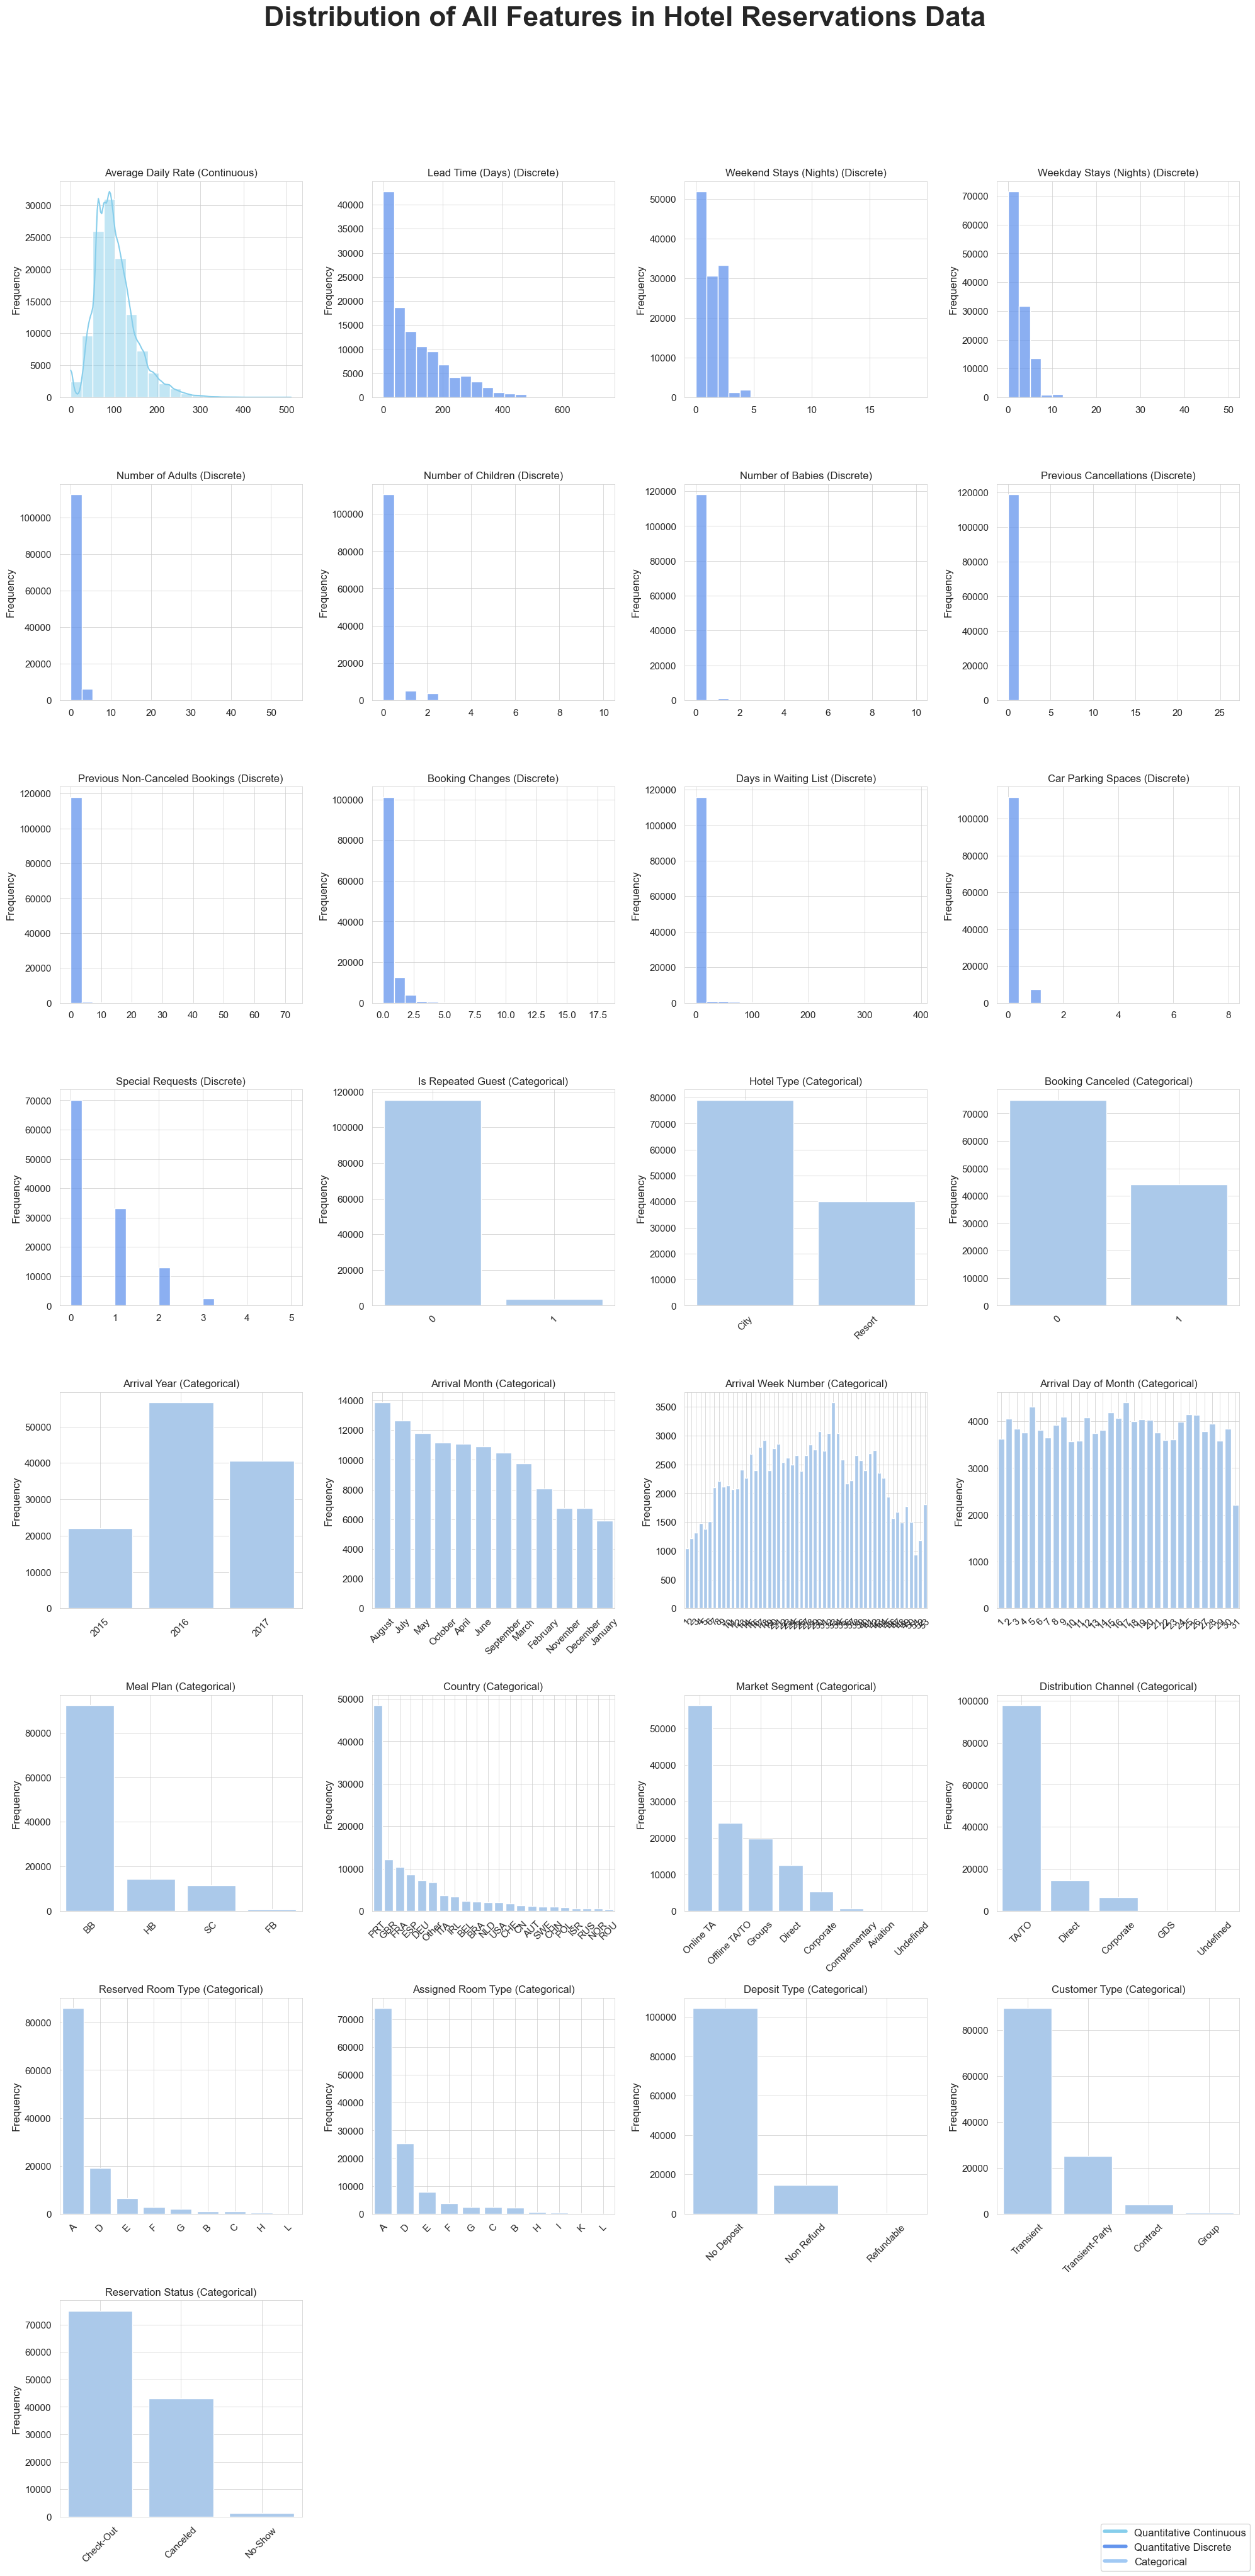

In [189]:
# Define the dataset
data = hotel_reservations_data.copy()

# Group low-frequency countries into "Other"
country_threshold = 500  # Minimum frequency to keep a country as-is
if 'country' in data.columns:
    country_counts = data['country'].value_counts()
    data['country'] = data['country'].apply(lambda x: x if country_counts[x] >= country_threshold else 'Other')

# Categorize features
quantitative_continuous = ['adr']  # Continuous numerical features
quantitative_discrete = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
    'required_car_parking_spaces', 'total_of_special_requests'
]  # Discrete numerical features
categorical = [
    'is_repeated_guest', 'hotel_type', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 
    'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'customer_type', 'reservation_status'
]  # Categorical features

# Combine all features
all_features = quantitative_continuous + quantitative_discrete + categorical

# Human-readable names for features
feature_names = {
    'adr': 'Average Daily Rate',
    'lead_time': 'Lead Time (Days)',
    'stays_in_weekend_nights': 'Weekend Stays (Nights)',
    'stays_in_week_nights': 'Weekday Stays (Nights)',
    'adults': 'Number of Adults',
    'children': 'Number of Children',
    'babies': 'Number of Babies',
    'previous_cancellations': 'Previous Cancellations',
    'previous_bookings_not_canceled': 'Previous Non-Canceled Bookings',
    'booking_changes': 'Booking Changes',
    'days_in_waiting_list': 'Days in Waiting List',
    'required_car_parking_spaces': 'Car Parking Spaces',
    'total_of_special_requests': 'Special Requests',
    'is_repeated_guest': 'Is Repeated Guest',
    'hotel_type': 'Hotel Type',
    'is_canceled': 'Booking Canceled',
    'arrival_date_year': 'Arrival Year',
    'arrival_date_month': 'Arrival Month',
    'arrival_date_week_number': 'Arrival Week Number',
    'arrival_date_day_of_month': 'Arrival Day of Month',
    'meal': 'Meal Plan',
    'country': 'Country',
    'market_segment': 'Market Segment',
    'distribution_channel': 'Distribution Channel',
    'reserved_room_type': 'Reserved Room Type',
    'assigned_room_type': 'Assigned Room Type',
    'deposit_type': 'Deposit Type',
    'customer_type': 'Customer Type',
    'reservation_status': 'Reservation Status'
}

# Set up the grid for subplots
num_features = len(all_features)
cols = 4
rows = (num_features // cols) + (num_features % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(all_features):
    ax = axes[i]
    readable_name = feature_names.get(feature, feature)
    if feature in quantitative_continuous:
        # Filter out ADR outlier
        sns.histplot(data[feature], bins=20, kde=True, ax=ax, color='skyblue')
        ax.set_title(f'{readable_name} (Continuous)', fontsize=12)
    elif feature in quantitative_discrete:
        sns.histplot(data[feature], bins=20, kde=False, ax=ax, color='cornflowerblue')
        ax.set_title(f'{readable_name} (Discrete)', fontsize=12)
    elif feature in categorical:
        # Sort x-axis in ascending order for numeric-like categorical variables
        if data[feature].dtype in ['int64', 'float64']:
            order = sorted(data[feature].dropna().unique())
        else:
            order = data[feature].value_counts().index
        sns.countplot(data=data, x=feature, ax=ax, order=order)
        ax.set_title(f'{readable_name} (Categorical)', fontsize=12)
        ax.set_xticks(range(len(order)))
        ax.set_xticklabels(order, rotation=45)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
    
    ax.grid(linewidth=0.5)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a legend for feature types
handles = [
    plt.Line2D([0], [0], color='skyblue', lw=4, label='Quantitative Continuous'),
    plt.Line2D([0], [0], color='cornflowerblue', lw=4, label='Quantitative Discrete'),
    plt.Line2D([0], [0], lw=4, label='Categorical')
]
fig.legend(handles=handles, loc='lower right', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Distribution of All Features in Hotel Reservations Data', fontsize=32, y=1.02, fontweight='bold')
plt.show()

##### Early Insights

**Inferences from the Distribution of Features**
- **Booking Behavior**: Most bookings are short notice (right-skewed lead time) and are non-repeated guests with no prior cancellations or changes.

- **Stay Characteristics**: Majority of stays are short: 1–3 nights on weekdays, 0 or 2 nights on weekends; long stays are rare.

- **Guest Demographics**: Most bookings are for 2 adults, with no children or babies.

- **Reservation Trends**: ~63% not canceled, ~37% canceled, peaking in August and mostly in 2016.

- **Booking Sources & Preferences**: Dominant booking through Online Travel Agencies (OTA); most guests choose BB (bed & breakfast) meal plans and no deposit reservations.

- **Hotel Type Preference**: City Hotels dominate over Resort Hotels — important for understanding guest intent (business vs. leisure), seasonality, or pricing strategies.

- **Special Requests & Parking**: Most guests make no special requests, and very few request parking — relevant for operational planning and upsell opportunities.

- **Room Type Consistency**: Reserved and assigned room types closely align, mainly types A, D, E, F, G — useful for capacity planning and understanding guest expectations.

- **Country of Origin**: Portugal (PRT) is the top source market, followed by GBR, FRA, ESP, DEU — helpful for targeting promotions or understanding cultural preferences.

- **Customer Type**: Dominated by Transient and Transient-Party guests — further confirming short-stay, individual traveler patterns (vs. groups or corporate).


| Feature                          | Key Insight / Distribution                                   |
| :------------------------------- | :----------------------------------------------------------- |
| Average Daily Rate (ADR)         | Right-skewed; Peak ~100; Most < 200                          |
| Lead Time (Days)                 | Heavily Right-skewed; Most bookings short notice             |
| Weekend Nights Stayed            | Peaks: 0, 2 nights; 1 common; >2 rare                      |
| Weekday Nights Stayed           | Right-skewed; Peak: 1-3 nights; Longer stays rare             |
| Number of Adults                 | Peak: 2; 1 & follow; >3 rare; 0 needs check                  |
| Number of Children               | Vast majority: 0; followed by 1 and 2, >3 rare                                 |
| Number of Babies                 | Vast majority: 0; Very rare                                |
| Previous Cancellations         | Vast majority: 0 (Few repeat guests)                                             |
| Previous Non-Canceled Bookings   | Vast majority: 0 (Few repeat guests)                       |
| Booking Changes                  | Vast majority: 0                                             |
| Days in Waiting List                | Vast majority: 0                                             |
| Car Parking Spaces               | Vast majority: 0; 1 rare                                   |
| Special Requests                 | Peak: 0; 1 common; Decreasing frequency                      |
| Repeated Guest                | Majority: Not repeated; Few repeat guests |
| Reservation Status               | ~60% Check-Out; ~37% Canceled; ~1% No-Show                 |
| Hotel Type                       | City Hotel > Resort Hotel                                    |
| Booking Canceled (`is_canceled`) | Not Canceled ~63%, Canceled ~37%                        |
| Arrival Year                     | Bookings are highest in 2016, followed by 2017 and 2015.   |
| Arrival Month                    | Peak: August; High: July, May; Low: Jan, Nov, Dec          |
| Arrival Week Number              | Bookings are evenly distributed across weeks, with slight peaks in mid-year weeks. |
| Arrival Day of Month             | Bookings are evenly distributed across all days of the month, with no significant peaks. |
| Market Segment     | Dominant: Online TA; Others: Offline TA/TO, Groups, Direct |
| Meal Preferences                 | Dominant: BB; Others: HB, SC; Rare: FB                      |
| Country of Origin                | Top: PRT; Others high: GBR, FRA, ESP, DEU                  |
| Distribution Channel             | Top: TA/TO; Others: Direct, Corporate                      |
| Reserved Room Type               | Top: A, D, E, F, G                                           |
| Assigned Room Type               | Top: A, D, E, F, G (Similar to Reserved)                     |
| Deposit Type                     | Dominant: No Deposit; Small: Non Refund; Rare: Refundable   |
| Customer Type                    | Top: Transient, Transient-Party; Others: Contract, Group   |

In [187]:
# TODO: Interaction terms